### DAGUMATI VISHNUVARDHAN
### THE SPARKS FOUNDATION 
### DATA SCIENCE  AND BUSINESS ANALYTICS INTERN
#### DATASET : Iris.CSV (Dataset : https://bit.ly/3kXTdox)
### Prediction using Decision Tree Algorithm

## <center> Implementation of Decision Tree Algorithm using Sklearn </center>

### Importing the dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',None)
%matplotlib inline

In [2]:
data = pd.read_csv('https://bit.ly/3kXTdox')
print('The shape of the dataset : ',data.shape)
data.head()

HTTPError: HTTP Error 429: Too Many Requests

### Exploratory Data analysis

#### Describing the data

In [3]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


#### Checking for missing values

In [4]:
for i in data.columns:
    print(f'{i} has {data[i].isnull().sum()} missing values')

Id has 0 missing values
SepalLengthCm has 0 missing values
SepalWidthCm has 0 missing values
PetalLengthCm has 0 missing values
PetalWidthCm has 0 missing values
Species has 0 missing values


#### Correlation between features

In [5]:
data.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


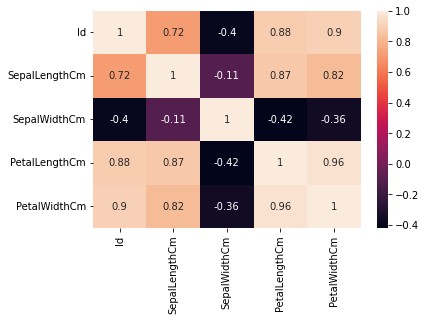

In [6]:
sns.heatmap(data.corr(),annot=True)
plt.show()

#### Detection of outliers

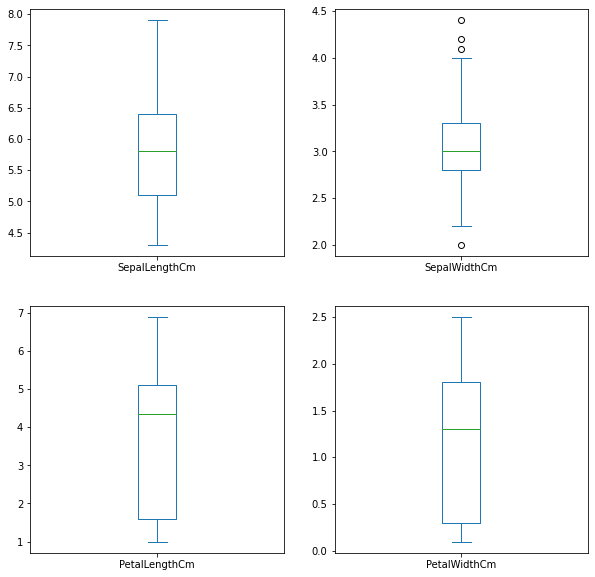

In [7]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
data['SepalLengthCm'].plot.box()
plt.subplot(2,2,2)
data['SepalWidthCm'].plot.box()
plt.subplot(2,2,3)
data['PetalLengthCm'].plot.box()
plt.subplot(2,2,4)
data['PetalWidthCm'].plot.box()
plt.show()

#### Plotting the distribution 

C:\Users\veda keerthi\anaconda3\envs\Nvidia-GPU\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\veda keerthi\anaconda3\envs\Nvidia-GPU\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\veda keerthi\anaconda3\envs\Nvidia-GPU\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figur

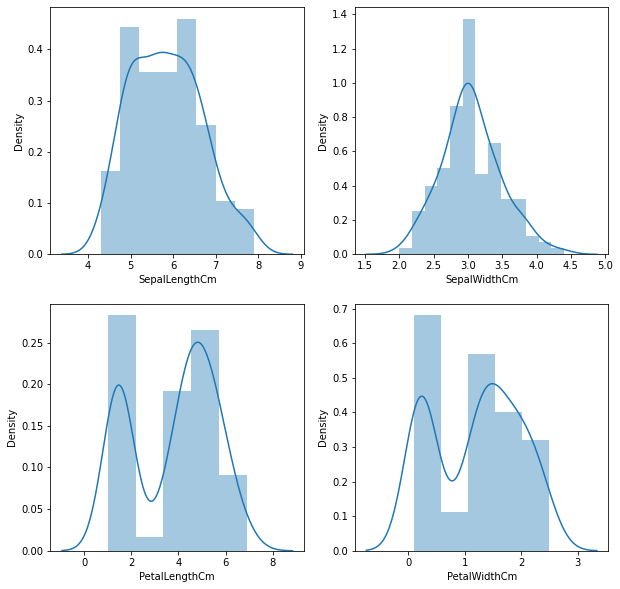

In [8]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.distplot(data['SepalLengthCm'])
plt.subplot(2,2,2)
sns.distplot(data['SepalWidthCm'])
plt.subplot(2,2,3)
sns.distplot(data['PetalLengthCm'])
plt.subplot(2,2,4)
sns.distplot(data['PetalWidthCm'])
plt.show()

### Feature engineering

#### Removing the feature 'Id'

In [9]:
data.drop('Id',axis=1,inplace=True)

In [10]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


#### Removing the outliers in 'SepalWidthCm'

In [11]:
upper_boundary = data.SepalWidthCm.mean() + 3*data.SepalWidthCm.std()
lower_boundary = data.SepalWidthCm.mean() - 3*data.SepalWidthCm.std()
print(f'Consider the data greater than {lower_boundary} and lesser than {upper_boundary}')

Consider the data greater than 1.7532170659134791 and lesser than 4.354782934086521


In [12]:
upper_outlier = data[data['SepalWidthCm'] > upper_boundary].index
data.drop(upper_outlier,inplace = True)
lower_outlier = data[data['SepalWidthCm'] < lower_boundary].index
data.drop(lower_outlier,inplace = True)
data.shape

(149, 5)

### Data splitting

In [13]:
X = data.drop(['Species'],axis = 1)
y = data[['Species']]

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)
print(f'The shape of training data is : {x_train.shape,y_train.shape}')
print(f'The shape of testing data is : {x_test.shape,y_test.shape}')

The shape of training data is : ((104, 4), (104, 1))
The shape of testing data is : ((45, 4), (45, 1))


### Model creation

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
model = DecisionTreeClassifier()
model.fit(x_train,y_train)
print('Model has been created and trained')

Model has been created and trained


### Representing the model

#### 1) Using text representation

In [16]:
print(tree.export_text(model))

|--- feature_3 <= 1.75
|   |--- feature_3 <= 0.80
|   |   |--- class: Iris-setosa
|   |--- feature_3 >  0.80
|   |   |--- feature_2 <= 5.45
|   |   |   |--- class: Iris-versicolor
|   |   |--- feature_2 >  5.45
|   |   |   |--- class: Iris-virginica
|--- feature_3 >  1.75
|   |--- class: Iris-virginica



#### 2) Using graphical representation

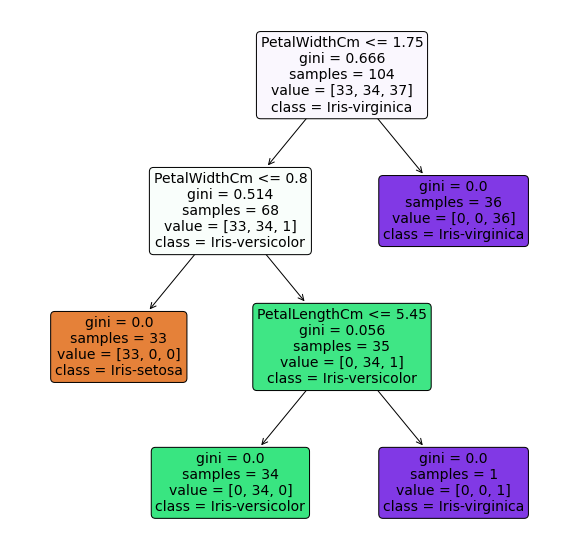

In [17]:
fig = plt.figure(figsize=(10,10))
_ = tree.plot_tree(model, 
                   feature_names=data.columns[:-1],  
                   class_names=data.Species.unique(),rounded=True,filled=True,fontsize=14)
plt.savefig('tree.png',format='png',bbox_inches = "tight")

### Testing the model

In [18]:
y_pred = model.predict(x_test)

### Evaluation metrics of the model

In [19]:
from sklearn.metrics import accuracy_score
result = accuracy_score(y_test,y_pred)
print('The accuracy of the decision tree model : ',result)

The accuracy of the decision tree model :  0.9111111111111111
